In [1]:
#Import tensorflow
import tensorflow as tf


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 105s 9us/step


In [10]:
#Shapes of Training and Test sets
print("X_train: ",X_train.shape, "  Type : ",type(X_train))
print("X_test: ",X_test.shape, "  Type : ",type(X_test))
print("Y_train: ",Y_train.shape ,"  Type : ",type(Y_train))
print("Y_test: ",Y_test.shape,"  Type : ",type(Y_test))

X_train:  (60000, 28, 28)   Type :  <class 'numpy.ndarray'>
X_test:  (10000, 28, 28)   Type :  <class 'numpy.ndarray'>
Y_train:  (60000,)   Type :  <class 'numpy.ndarray'>
Y_test:  (10000,)   Type :  <class 'numpy.ndarray'>


In [11]:
X_train,X_test = X_train/255,X_test/255

In [31]:
#Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [32]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#Train the model

r = model.fit(X_train,Y_train, validation_data = (X_test,Y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3567 - accuracy: 0.8939 - val_loss: 0.1548 - val_accuracy: 0.9541
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1911 - accuracy: 0.9434 - val_loss: 0.1197 - val_accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1546 - accuracy: 0.9531 - val_loss: 0.1017 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1345 - accuracy: 0.9593 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1213 - accuracy: 0.9622 - val_loss: 0.0804 - val_accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1113 - accuracy: 0.9657 - val_loss: 0.0846 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1025 - accuracy: 0.9679 - val_loss: 0.0829 - val_accuracy:

In [33]:
#Evaluate the model
print(model.evaluate(X_test,Y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9795
[0.07532517611980438, 0.9794999957084656]


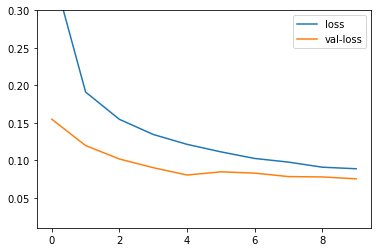

In [35]:
#Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val-loss')
plt.ylim((0.01,0.30))
plt.legend()

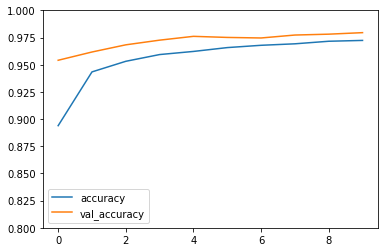

In [34]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.ylim((0.8,1))
plt.legend()

Confusion matrix without Normalization
[[ 972    0    2    2    0    1    1    1    1    0]
 [   0 1126    4    0    0    0    1    0    4    0]
 [   4    1 1010    1    4    0    2    6    4    0]
 [   0    0    3  991    0    4    0    5    4    3]
 [   0    0    3    0  965    0    5    1    0    8]
 [   2    0    0    7    2  870    4    2    4    1]
 [   5    3    1    2    3    8  936    0    0    0]
 [   1    5   11    3    1    0    0 1005    0    2]
 [   4    0    4    7    4    3    0    3  945    4]
 [   4    3    0    7    9    5    0    5    1  975]]


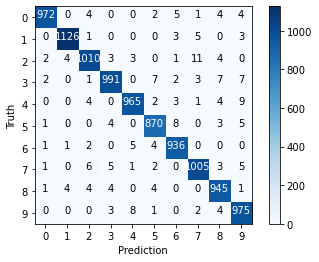

In [60]:
#Let's see the confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    if normalize ==True:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Confusion matrix with Normalization')
    else:
        print('Confusion matrix without Normalization')
        
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    ticks = np.arange(len(classes))
    plt.xticks(ticks,classes)
    plt.yticks(ticks,classes)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    thres = cm.max()/2
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(i,j,cm[i,j],horizontalalignment = 'center', color = 'white' if cm[i,j]>thres else 'black')
        
    plt.colorbar()
        
p_test = model.predict(X_test)    
p_test = p_test.argmax(axis = 1)
cm = confusion_matrix(Y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'Predicted :3, Actual:6')

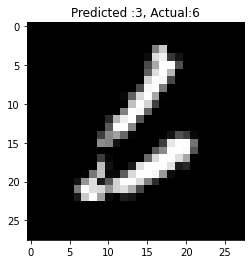

In [80]:
#Let's look at some examples where images are being mis-classifiedd
misc = np.where(p_test!=Y_test)[0]
i = np.random.choice(misc)
plt.imshow(X_test[i],cmap='gray')
plt.title('Predicted :{}, Actual:{}'.format(p_test[i],Y_test[i]))

Text(0.5, 1.0, 'Predicted :2, Actual:2')

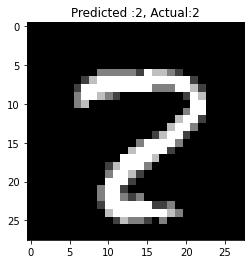

In [85]:
#Examples , predicted correctly
misc = np.where(p_test==Y_test)[0]
i = np.random.choice(misc)
plt.imshow(X_test[i],cmap='gray')
plt.title('Predicted :{}, Actual:{}'.format(p_test[i],Y_test[i]))